# Mall Customer Segmentation 

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Collection

In [2]:
df = pd.read_csv('C:/Users/kumar/OneDrive/Desktop/Machine Learning Project/datasets/mall customers.csv')
df.shape

(200, 5)

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Data Preprocessing

In [6]:
# handling null values :
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
# handling duplicate values
df.duplicated().sum()

np.int64(0)

In [8]:
# Handling Categorical Columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical columns:", categorical_cols)

Categorical columns: ['Gender']


In [9]:
# using binary encoder for Gender column:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df.head()
# 1 - > M 
# 0 - > F

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [10]:
from sklearn.preprocessing import StandardScaler

# Assume df has only numerical features now
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)


## Training Model

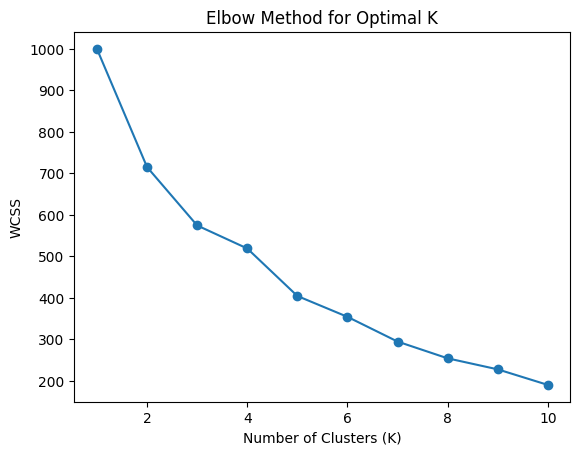

In [11]:
# using K-means
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()


In [12]:
pip install cudf , cuml

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: ',': Expected package name at the start of dependency specifier
    ,
    ^


K=2, Silhouette Score=0.254
K=3, Silhouette Score=0.255
K=4, Silhouette Score=0.302
K=5, Silhouette Score=0.310


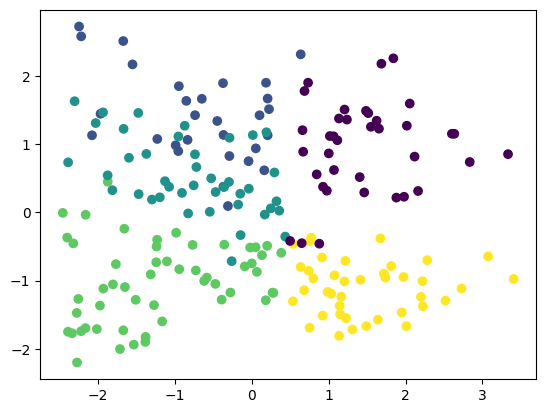

         CustomerID    Gender        Age  Annual Income (k$)  \
Cluster                                                        
0        162.891892  0.513514  39.891892           87.432432   
1         70.275862  1.000000  56.724138           48.068966   
2         71.634146  0.000000  49.463415           48.780488   
3         50.169811  0.396226  24.886792           38.509434   
4        160.975000  0.475000  32.550000           86.050000   

         Spending Score (1-100)  
Cluster                          
0                     18.837838  
1                     39.724138  
2                     41.658537  
3                     60.830189  
4                     81.475000  
Cluster
3    53
2    41
4    40
0    37
1    29
Name: count, dtype: int64


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"K={k}, Silhouette Score={score:.3f}")

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=df['Cluster'])
plt.show()

print(df.groupby('Cluster').mean())
print(df['Cluster'].value_counts())


Thanks!